In [21]:
!pip install tensorflow==2.5.0 tensorflow-gpu==2.5.0 opencv-python mediapipe==0.8.8 sklearn matplotlib

In [47]:
import mediapipe as mp 

In [48]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time

In [49]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [57]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [51]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [52]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [53]:
#mp_holistic.FACEMESH_CONTOURS

In [54]:
#mp_drawing.draw_landmarks??

In [64]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [70]:
results.left_hand_landmarks

In [67]:
results

mediapipe.python.solution_base.SolutionOutputs

In [71]:
draw_landmarks(frame, results)

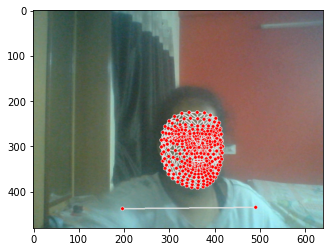

In [72]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint values 

In [74]:
results.face_landmarks

landmark {
  x: 0.5724115967750549
  y: 0.6954967975616455
  z: -0.030749207362532616
}
landmark {
  x: 0.5748621821403503
  y: 0.6461066603660583
  z: -0.04797615110874176
}
landmark {
  x: 0.572043776512146
  y: 0.6634823679924011
  z: -0.027289249002933502
}
landmark {
  x: 0.5644077658653259
  y: 0.6044836640357971
  z: -0.033934127539396286
}
landmark {
  x: 0.5750374794006348
  y: 0.6319900751113892
  z: -0.049995169043540955
}
landmark {
  x: 0.5737331509590149
  y: 0.6152485013008118
  z: -0.04494539648294449
}
landmark {
  x: 0.5693329572677612
  y: 0.5771746635437012
  z: -0.016878196969628334
}
landmark {
  x: 0.4996086657047272
  y: 0.5777750015258789
  z: 0.006733339745551348
}
landmark {
  x: 0.5679222941398621
  y: 0.5498729944229126
  z: -0.007916637696325779
}
landmark {
  x: 0.5681193470954895
  y: 0.5325757265090942
  z: -0.007781787309795618
}
landmark {
  x: 0.5660997033119202
  y: 0.4693251848220825
  z: 0.009282008744776249
}
landmark {
  x: 0.5723397731781006
  

In [75]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [76]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [77]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)

IndentationError: unexpected indent (Temp/ipykernel_5528/3987811915.py, line 2)

In [78]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [79]:
extract_keypoints(results).shape

(1662,)

In [80]:
468*3+33*4+21*3+21*3

1662

In [81]:
result_test = extract_keypoints(results)
result_test

array([ 0.57304734,  0.63029027, -1.28584015, ...,  0.        ,
        0.        ,  0.        ])

In [82]:
np.save('0', result_test)
np.load('0.npy')

array([ 0.57304734,  0.63029027, -1.28584015, ...,  0.        ,
        0.        ,  0.        ])

# 4.Setup Folders For Collection

In [83]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thankyou', 'goodbye', 'i', 'like', 'food'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [84]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5.Collect keypoints values for training and testing 

In [85]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #  print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [96]:
cap.release()
cv2.destroyAllWindows()

# 6.Pre process data and create lables and features

In [87]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [88]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thankyou': 1, 'goodbye': 2, 'i': 3, 'like': 4, 'food': 5}

In [89]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [90]:
np.array(sequences).shape

(180, 30, 1662)

In [91]:
np.array(labels).shape

(180,)

In [92]:
X = np.array(sequences)
X.shape

(180, 30, 1662)

In [93]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [95]:
y_test.shape

(9, 6)

# 7.Build and train LSTM NN

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [98]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [99]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [100]:
res = [.7, 0.2, 0.1]
actions[np.argmax(res)]

'hello'

In [102]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [103]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])
model.summary()

Epoch 1/2000
6/6 [==============================] - 5s 373ms/step - loss: 9.9533 - categorical_accuracy: 0.1696
Epoch 2/2000
6/6 [==============================] - 1s 110ms/step - loss: 13.0802 - categorical_accuracy: 0.1579
Epoch 3/2000
6/6 [==============================] - 1s 106ms/step - loss: 13.3971 - categorical_accuracy: 0.1754
Epoch 4/2000
6/6 [==============================] - 1s 133ms/step - loss: 26.1668 - categorical_accuracy: 0.1579
Epoch 5/2000
6/6 [==============================] - 1s 108ms/step - loss: 16.6836 - categorical_accuracy: 0.1228
Epoch 6/2000
6/6 [==============================] - 1s 116ms/step - loss: 27.3778 - categorical_accuracy: 0.1404
Epoch 7/2000
6/6 [==============================] - 1s 104ms/step - loss: 38.4675 - categorical_accuracy: 0.1813
Epoch 8/2000
6/6 [==============================] - 1s 107ms/step - loss: 76.8571 - categorical_accuracy: 0.1813
Epoch 9/2000
6/6 [==============================] - 1s 113ms/step - loss: 273.1230 - categorical_

In [105]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 596,774
Trainable params: 596,774
Non-trainable params: 0
__________________________________________________

In [120]:
res = model.predict(X_test)
actions[np.argmax(res[7])]

'like'

In [121]:
actions[np.argmax(y_test[7])]

'i'

# 9

In [ ]:
model.save('action.h5')
